## Blind source separation with an autoencoder

#### Author
<pre style="font-size: 120%">
Daniel Correa Tucunduva 
</pre>


## Setup

In [1]:
# Module setup

print(__doc__)

import numpy as np

from scipy import signal

import keras
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
from keras.layers import LSTM, Activation, Flatten, Dropout, BatchNormalization, Input, Dense, concatenate, Conv2D, Conv3D, MaxPooling2D, UpSampling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler

from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


Using TensorFlow backend.


In [2]:
grid = np.zeros([10, 10])

src_loc_1 = [3, 3]
src_loc_2 = [5, 7]
src_loc_3 = [8, 2]

src_1 = np.sin(np.arange(0, 1000, 0.01))  # sin

src_2 = np.zeros(src_1.shape[0])  # box
for i in np.arange(0, src_2.shape[0], 200):
    src_2[i:i + 100] = 1

src_3 = np.zeros(src_1.shape[0])  # sawtooth
for i in np.arange(0, src_3.shape[0], 200):
    src_3[i:i + 200] = np.arange(0, 200) / 200

from scipy.ndimage import gaussian_filter


def smooth_src(input_signal, sigma):
    print('smoothing...')
    for i in np.arange(0, input_signal.shape[2]):
        input_signal[:, :, i] = gaussian_filter(input_signal[:, :, i], sigma)

    return input_signal


src_grid_1 = np.zeros([10, 10, src_1.shape[0]])  # init 3d grid
src_grid_1[src_loc_1[0], src_loc_1[1], :] = src_1  # place point source in grid
src_grid_1 = smooth_src(src_grid_1, 3)  # smooth

src_grid_2 = np.zeros([10, 10, src_2.shape[0]])
src_grid_2[src_loc_2[0], src_loc_2[1], :] = src_2
src_grid_2 = smooth_src(src_grid_2, 3)

src_grid_3 = np.zeros([10, 10, src_3.shape[0]])
src_grid_3[src_loc_3[0], src_loc_3[1], :] = src_3
src_grid_3 = smooth_src(src_grid_3, 3)

mixed = src_grid_1 + src_grid_2 + src_grid_3  # goal is to unmix mixed
"""
the matrix 'mixed' is the sum of all 3 sources, where each source is a 2d gaussian
smoothed time series (sin, boxcar, sawtooth). the goal is to recover the original
time series, as well as the spatial topography of the original sources  
"""

from sklearn.decomposition import FastICA

reshape_mixed = np.reshape(mixed, [100, mixed.shape[2]])
ica = FastICA(n_components=3)  # we'll be generous and assume there's 3
ica.fit(reshape_mixed.T)  # .T because 100000 instances, 100 attributes
ica_comps = ica.transform(reshape_mixed.T)  # get the components
ica_weights = np.reshape(ica.components_.T, [10, 10, 3])  # visualize these as images


"""
put code down here to unmix the sources using a neural network. 
do not use the original sources in the training of the network. 
you can use the original sources to verify the quality of the network's reconstruction
you can start by creating a simple autoencoder (non-CNN) to see first if you can just
reconstruct the orginal input using a hidden-layer representation with 3 units, use
the reshaped vector as (line 51) as input to the network as for ICA.
if you are able to reconstruct the input well enough using the autoencoder, find a way
to obtain a hidden-layer representation of the time series, to see if the network is
actually capturing independent sources in the hidden layer units (it probably won't)
then move to more complex architectures (CNN). i'm hoping CNN will learn independent sources 
in the compressed hidden layer, because the data is spatially correlated
"""

smoothing...
smoothing...
smoothing...


"\nput code down here to unmix the sources using a neural network. \ndo not use the original sources in the training of the network. \nyou can use the original sources to verify the quality of the network's reconstruction\nyou can start by creating a simple autoencoder (non-CNN) to see first if you can just\nreconstruct the orginal input using a hidden-layer representation with 3 units, use\nthe reshaped vector as (line 51) as input to the network as for ICA.\nif you are able to reconstruct the input well enough using the autoencoder, find a way\nto obtain a hidden-layer representation of the time series, to see if the network is\nactually capturing independent sources in the hidden layer units (it probably won't)\nthen move to more complex architectures (CNN). i'm hoping CNN will learn independent sources \nin the compressed hidden layer, because the data is spatially correlated\n"

In [7]:
# input_shape = Input(shape=(10, 10, 1))
# 
# tower_1 = Conv2D(20, (100, 5), padding='same', activation='relu')(input_shape)
# tower_1 = MaxPooling2D((1, 11), strides=(1, 1), padding='same')(tower_1)
# 
# tower_2 = Conv2D(20, (100, 7), padding='same', activation='relu')(input_shape)
# tower_2 = MaxPooling2D((1, 9), strides=(1, 1), padding='same')(tower_2)
# 
# tower_3 = Conv2D(20, (100, 10), padding='same', activation='relu')(input_shape)
# tower_3 = MaxPooling2D((1, 6), strides=(1, 1), padding='same')(tower_3)
# 
# merged = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
# merged = Flatten()(merged)
# 
# out = Dense(200, activation='relu')(merged)
# out = Dense(10, activation='softmax')(out)
# 
# model = Model(input_shape, out)
# 
# model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 10, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 10, 10, 20)   10020       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 10, 10, 20)   14020       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 10, 10, 20)   20020       input_1[0][0]                    
____________________________________________________________________________________________

In [6]:
# dense = Sequential()
# dense.add(Dense(3, input_shape=[100]))
# dense.add(Dense(100, activation='linear'))
# 
# dense.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 303       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               400       
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [4]:
# weight_decay = 1e-4
# cnn = Sequential()
# cnn.add(Conv2D(16, (3, 3), strides=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[10, 10, 1]))
# cnn.add(Activation('elu'))
# cnn.add(BatchNormalization())
# cnn.add(Conv2D(16, (3, 3), strides=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# cnn.add(Activation('elu'))
# cnn.add(BatchNormalization())
# cnn.add(Conv2D(8, (3, 3), strides=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# cnn.add(Activation('elu'))
# cnn.add(Conv2D(8, (2, 2), strides=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# cnn.add(Activation('elu'))
# 
# cnn.add(Flatten())
# cnn.add(Dense(100, activation='linear'))
# 
# cnn.summary()


In [5]:
# weight_decay = 1e-4
# cnn = Sequential()
# cnn.add(Conv3D(3, (4, 4, 4), strides=(2, 2, 1), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[8, 8, 100, 1]))
# cnn.add(Activation('elu'))
# cnn.add(Conv3D(3, (4, 4, 4), strides=(2, 2, 1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# cnn.add(Activation('elu'))
# cnn.add(BatchNormalization())
# cnn.add(Conv3D(3, (4, 4, 4), strides=(2, 2, 1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# cnn.add(Activation('elu'))
# cnn.add(Flatten())
# cnn.add(Dense(100, activation='linear'))
# 
# cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_13 (Conv3D)           (None, 4, 4, 100, 3)      195       
_________________________________________________________________
activation_15 (Activation)   (None, 4, 4, 100, 3)      0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 2, 2, 100, 3)      579       
_________________________________________________________________
activation_16 (Activation)   (None, 2, 2, 100, 3)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 2, 2, 100, 3)      12        
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 1, 1, 100, 3)      579       
_________________________________________________________________
activation_17 (Activation)   (None, 1, 1, 100, 3)     

In [73]:
# def learning_rate_schedule(epoch):
#     if epoch > 30:
#         return 0.00025
#     if epoch > 20:
#         return 0.0005
#     return 0.001
# 
# optimizer = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
# cnn.compile(loss='mean_squared_error', optimizer=optimizer)
# 
# sliced = np.reshape(mixed, [10000, 10, 10, 10, 1])
# 
# target = np.reshape(reshape_mixed.T, [10000, 1000])
#     
# 
# cnn.fit(sliced,
#         target,
#         epochs=5,
#         batch_size=100,
#         shuffle=True)

Epoch 1/5
10000/10000 [==============================] - 2s 195us/step - loss: 2.1401e-04
Epoch 2/5
10000/10000 [==============================] - 1s 133us/step - loss: 1.1992e-04
Epoch 3/5
10000/10000 [==============================] - 1s 133us/step - loss: 1.1291e-04
Epoch 4/5
10000/10000 [==============================] - 1s 134us/step - loss: 1.1310e-04
Epoch 5/5
10000/10000 [==============================] - 1s 143us/step - loss: 1.1287e-04


In [5]:
# optimizer = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
# cnn.compile(loss='mean_squared_error', optimizer=optimizer)
# 
# def learning_rate_schedule(epoch):
#     if epoch > 30:
#         return 0.00025
#     if epoch > 20:
#         return 0.0005
#     return 0.001
# 
# cnn_mixed = np.reshape(mixed, [1, 10, 10, 100000])
# 
# print(cnn_mixed.shape)
# 
# generator = ImageDataGenerator()
# history_cnn = cnn.fit_generator(
#     generator.flow(cnn_mixed.T, reshape_mixed.T, batch_size=1000),
#     steps_per_epoch=100,
#     epochs=10,
#     verbose=1,
#     callbacks=[LearningRateScheduler(learning_rate_schedule)],
#     shuffle=True
# )

In [55]:
dense = Sequential()
dense.add(Dense(3, input_shape=[100]))
dense.add(Dense(100, activation='linear'))

dense.summary()

hidden = Sequential()
hidden.add(Dense(3, input_shape=[100]))

hidden.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3)                 303       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               400       
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 303       
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1/1 [==============================] - 0s 191ms/step - loss: 4.6131
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 4.5739
Epoch 3/5
1/1 [==============================] - 0s 982us/step - loss: 4.5479
Epoch 4/5
1/1 [==============================] - 0s 998us/step - loss: 4.5272
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 4.5096
0.0 1.0 0.0
[[-0.07401344 -0.0453392  -0.1696673 ]]


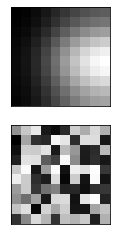

In [57]:
optimizer = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
dense.compile(loss='kullback_leibler_divergence', optimizer=optimizer)

frame = np.reshape(reshape_mixed.T[0], [1, 100])

def learning_rate_schedule(epoch):
    if epoch > 50:
        return 0.00025
    if epoch > 10:
        return 0.0005
    return 0.001

dense_history = dense.fit(frame,
                          frame,    
                          epochs=5,    
                          verbose=1)

hidden.set_weights(dense.get_weights())

print(src_1[0], src_2[0], src_3[0],)
print(hidden.predict(frame))

dense_json = dense.to_json()
with open('dense.json', 'w') as json_file:
    json_file.write(dense_json)
dense.save_weights('dense.h5')

prediction = dense.predict(frame)

ax = plt.subplot(2, 1, 1)
plt.imshow(np.reshape(frame, [10, 10]))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.reshape(prediction, [10, 10]))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [20]:
# prediction = dense.predict(frame)

In [79]:
# prediction = cnn.predict(sliced)
# 
# pred = np.reshape(prediction[0], [10, 10, 10])

In [80]:
# print(prediction.shape)
# print(pred.shape)

(10000, 1000)
(10, 10, 10)


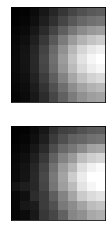

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
j = 1
# for i in [0, 10, 100, 500, 3000, 9999]:
    # display original
ax = plt.subplot(2, 10, j)
plt.imshow(np.reshape(frame, [10, 10]))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# display reconstruction
ax = plt.subplot(2, 10, j + 10)
plt.imshow(np.reshape(prediction, [10, 10]))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
    
    # j += 1
# plt.show()

In [10]:
# hidden_layer_output_model = Sequential()
# hidden_layer_output_model.add(Dense(1, input_shape=[100]))
# 
# hidden_layer_output_model.summary()
# 
# hidden_layer_output_model.set_weights(dense.layers[0].get_weights())
# 
# hidden_layer_output_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [11]:
# hidden_layer_output = hidden_layer_output_model.predict(reshape_mixed.T)
# 
# print(hidden_layer_output[100])
# print(src_grid_1[3, 3, 100], src_grid_2[5, 7, 0], src_grid_3[8, 2, 100])
